In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
df = pd.read_csv("urgency_classification_cleaned_dataset.csv")
df

,expiryDaysLeft,quantityKg,donationTimeHour,recipientDemandScore,distanceToRecipientKm,urgencyLevel,storageType_Refrigerated,storageType_RoomTemp,foodCategory_Dairy,foodCategory_Fruits,foodCategory_Meat,foodCategory_PreparedMeals,foodCategory_Vegetables
0,0.024222,-0.923251,1.475950,0.275858,1.817388,0,True,False,True,False,False,False,False
1,0.487804,0.393335,-0.829997,-0.990515,1.135668,1,False,False,True,False,False,False,False
2,-1.598315,0.566292,1.187707,0.099973,-0.170242,0,True,False,False,False,False,False,True
3,0.024222,1.127518,-0.397632,0.486921,-0.052308,2,False,False,False,False,False,False,False
4,0.719595,-0.987492,1.620072,-0.814630,-0.144354,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.487804,-1.511656,-1.262362,-1.236755,0.582670,1,False,False,False,False,False,False,True
1996,1.646760,1.508728,-1.694727,-0.709099,1.137107,1,False,True,False,True,False,False,False
1997,-1.134733,0.221085,0.467098,-1.271932,-0.388134,0,False,False,False,False,False,True,False
1998,0.951386,-1.206688,-1.118240,-0.005558,-0.273795,0,False,False,False,False,True,False,False


<h1>Feature Selection</h1>

In [188]:
X = df.drop('urgencyLevel', axis=1)
y = df['urgencyLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
print(X_train.columns.tolist())
print(X_train.dtypes)

['expiryDaysLeft', 'quantityKg', 'donationTimeHour', 'recipientDemandScore', 'distanceToRecipientKm', 'storageType_Refrigerated', 'storageType_RoomTemp', 'foodCategory_Dairy', 'foodCategory_Fruits', 'foodCategory_Meat', 'foodCategory_PreparedMeals', 'foodCategory_Vegetables']
expiryDaysLeft                float64
quantityKg                    float64
donationTimeHour              float64
recipientDemandScore          float64
distanceToRecipientKm         float64
storageType_Refrigerated         bool
storageType_RoomTemp             bool
foodCategory_Dairy               bool
foodCategory_Fruits              bool
foodCategory_Meat                bool
foodCategory_PreparedMeals       bool
foodCategory_Vegetables          bool
dtype: object


KNN with k=3: Accuracy = 0.7275
KNN with k=5: Accuracy = 0.7575
KNN with k=7: Accuracy = 0.7725
KNN with k=9: Accuracy = 0.7900
SVM with kernel='linear': Accuracy = 0.6875
SVM with kernel='poly': Accuracy = 0.8275
SVM with kernel='rbf': Accuracy = 0.9250
SVM with kernel='sigmoid': Accuracy = 0.5500


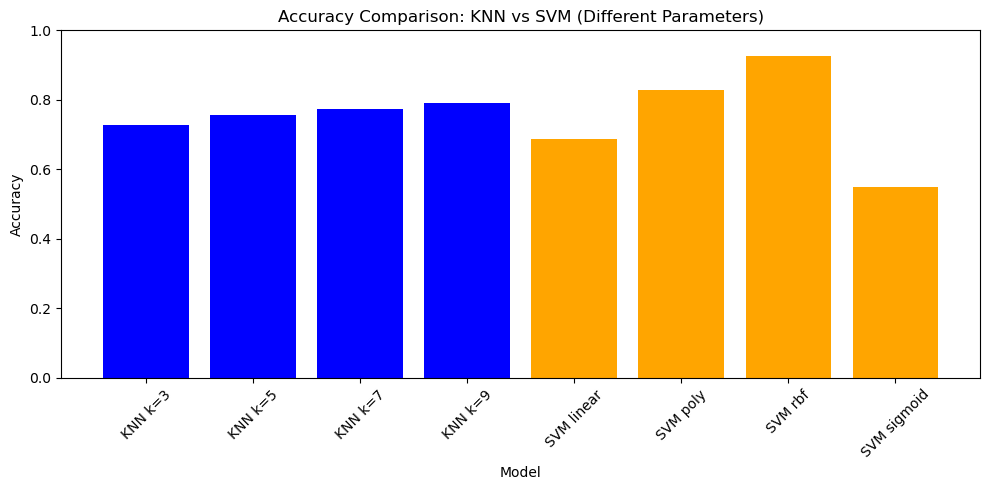

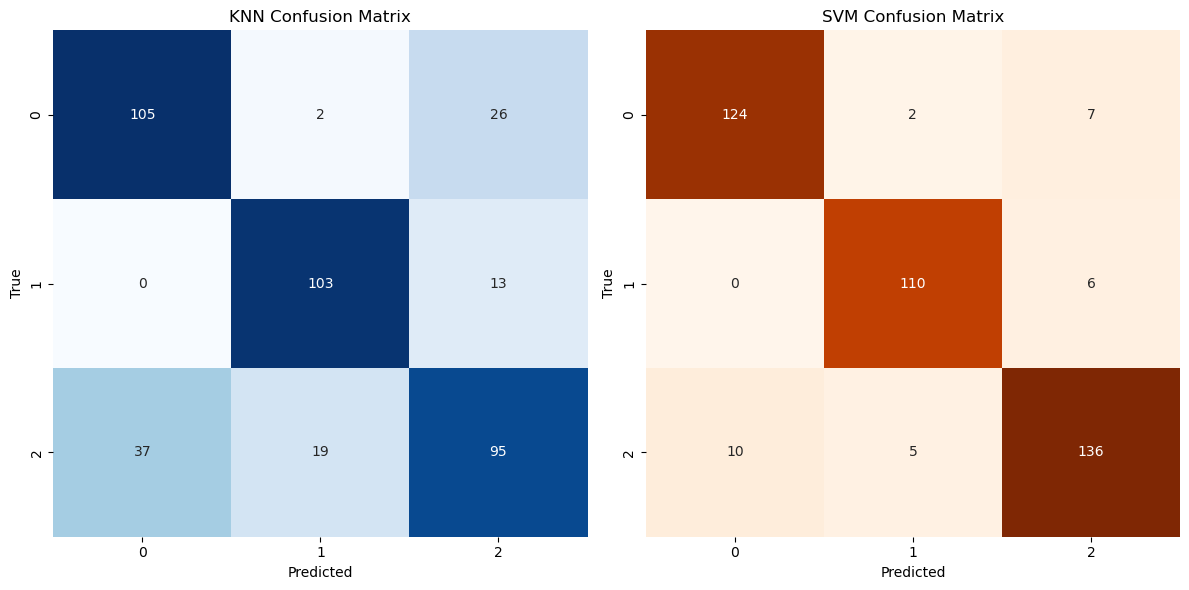

Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy: 0.8868750000000001
Best SVM Model Accuracy: 0.9175


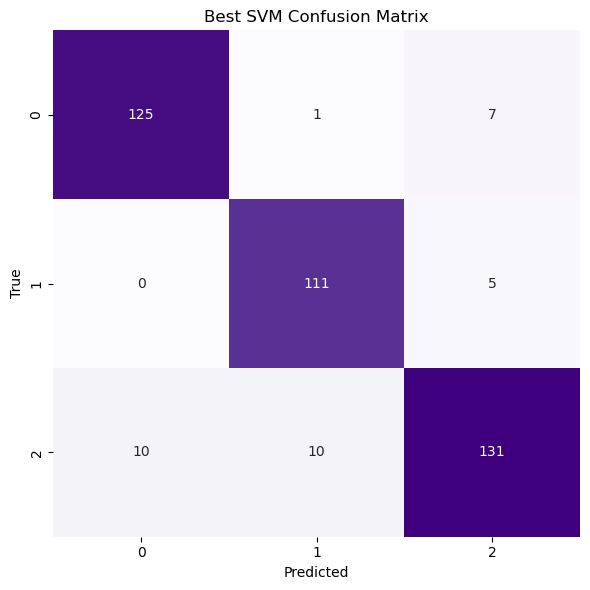

In [192]:
# Assuming df is your dataset
X = df.drop('urgencyLevel', axis=1)
y = df['urgencyLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- KNN: Trying different 'k' values ----
knn_accuracies = []
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(knn_accuracy)
    print(f"KNN with k={k}: Accuracy = {knn_accuracy:.4f}")

# ---- SVM: Trying different kernel types ----
svm_accuracies = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(svm_accuracy)
    print(f"SVM with kernel='{kernel}': Accuracy = {svm_accuracy:.4f}")

# ---- Plotting accuracy comparison ----
plt.figure(figsize=(10, 5))
plt.bar([f'KNN k={k}' for k in [3, 5, 7, 9]] + [f'SVM {kernel}' for kernel in ['linear', 'poly', 'rbf', 'sigmoid']],
        knn_accuracies + svm_accuracies, color=['blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs SVM (Different Parameters)')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- KNN Confusion Matrix ----
best_knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 for best KNN model as an example
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)
knn_confusion = confusion_matrix(y_test, y_pred_knn)

# ---- SVM Confusion Matrix ----
best_svm = SVC(kernel='rbf')  # Using 'rbf' as an example
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

# ---- Plotting confusion matrices ----
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KNN confusion matrix
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# SVM confusion matrix
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Oranges', ax=axes[1], cbar=False)
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# ---- GridSearchCV for SVM Hyperparameter Tuning ----
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best SVM Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# Final SVM model using the best parameters
best_svm_model = grid.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
print(f"Best SVM Model Accuracy: {best_svm_accuracy:.4f}")

# ---- Best Confusion Matrix for SVM ----
best_svm_confusion = confusion_matrix(y_test, y_pred_best_svm)

# Plotting the best SVM confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(best_svm_confusion, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Best SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [193]:
joblib.dump(best_svm_model, 'urgencey_transportation_model.pkl')

['urgencey_transportation_model.pkl']